<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Data%20Analyze%208)%20Data%20Classification%202%20and%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 13주차 실습

## 실습 시작 전 유의사항

※ 반드시 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.

## 실습 개요
- 분류 (Classification)
  - Decision Tree
  - Support Vector Machine
- 회귀 (Regression)

---

## 분류 (2)
데이터가 어떤 레이블에 해당될지 예측하는 작업입니다.

다양한 분류 기법들을 알아보고, 이를 sklearn에서 제공하는 도구를 통해 실습해보겠습니다.

### 결정 트리 (Decision Tree)
데이터를 기준에 따라 둘로 쪼개는 작업을 반복하여 클래스를 결정하는 분류 기법입니다.

</br>

<img src="https://i-cubic-i.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F725049b7-a462-4874-83d3-8d8fc3092f85%2F9e8655d7-6af9-4ebf-af52-2d228a0df0ec%2FDecision_Tree.png?table=block&id=14a9bfdf-6a1c-8036-bbe4-da70a10ea58d&spaceId=725049b7-a462-4874-83d3-8d8fc3092f85&width=2000&userId=&cache=v2" width=40%>

In [ ]:
# @title 기본 제목 텍스트
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
iris = datasets.load_iris() # data와 target으로 이뤄진 sklearn 데이터셋
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

# X와 y 집합을 학습용과 테스트용으로 분리 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

sklearn.tree에서는 결정 트리를 통해 분류를 수행할 수 있도록 DecisionTreeClassifier를 제공합니다.

데이터에 수치형 변수가 아닌 값(범주형 변수 등)이 존재한다면 수치로 변환해야 합니다.\
iris 데이터셋은 그런 변수가 없으니 넘어갈 수 있습니다.

**fit 메소드**를 통해 데이터를 분류하는 기준을 정하고, **predict 메소드**를 사용하여 데이터가 학습한 기준으로 분류됩니다.

In [ ]:
# @title 기본 제목 텍스트
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 객체를 생성
# 최대 깊이와 최대 잎노드 수 등을 정해줄 수 있습니다.
dt_tree = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 4) # 객체 생성.

# 모델 학습
dt_tree.fit(X_train,y_train)

# 클래스 예측
predictions = dt_tree.predict(X_test)

acc = (predictions == y_test).sum() / len(y_test)
print(f'정확도: {100*acc:.2f}%')

# 정확도는 모델의 score 메소드를 통해서도 확인할 수 있습니다.
# 이전에 배운 다른 모델들에서도 사용가능합니다.
acc = dt_tree.score(X_test,y_test)
print(f'(score: {100*acc:.2f}%)')

정확도: 97.78%
(score: 97.78%)


실제 결정 트리의 형태(분류 기준, 비율 등)은 sklearn.tree의 plot_tree 메소드를 통해\
원하는 모델을 시각화함으로써 볼 수 있습니다.

어떤 기준으로 쪼갰는지, Gini Index는 얼마인지, 몇 개의 데이터가 있는지, 가장 많은 클래스는 무엇인지 정보를 볼 수 있습니다.

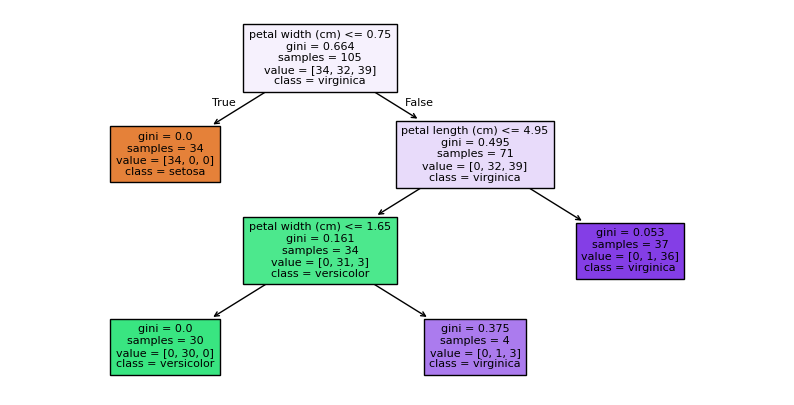

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 5))

tree.plot_tree(dt_tree, feature_names = iris.feature_names, class_names = iris.target_names, filled=True, ax=ax, fontsize=8)

plt.show()

Gini Index란, 데이터에 클래스 분포가 얼마나 섞여 있는지 계산하는 수치입니다.\
0에 가까울수록 하나의 클래스로 구성된 순수한 상태를 가집니다.

$Gini = 1 - \sum \limits^{c}_{i=1} p_i^2$

Decision Tree는 이 Gini 지수가 작아지는 방향으로 데이터를 학습합니다.

### SVM (Support Vector Machine)

SVM은 마진(margin)을 최대로하는 결정 경계를 찾는 분류 기법입니다.

SVM의 특징으로는, 다양한 커널을 사용할 수 있어서 데이터의 형태에 맞게 분류기를 설계할 수 있습니다. 그리고, C나 gamma 등을 조절하여 결정 경계의 유연성을 조절할 수 있습니다.

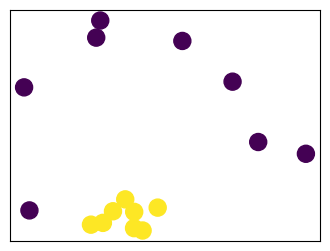

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 데이터셋 준비
X, y = datasets.make_moons(n_samples=16, noise=0.2, random_state=2)
X[y==0] *= 5
X[y==1] = datasets.make_blobs(n_samples=8, n_features=2, centers=1, center_box=(3, -4.5), cluster_std=1, random_state=14)[0]

fig, ax = plt.subplots(figsize=(4, 3))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt    # 이 코드들은 크게 신경 안 써도 괜춘

def plot_decisionBoundary(model, X, y, ax=None, show=True):
  if not ax:
    _, ax = plt.subplots(figsize=(4, 3))

  DecisionBoundaryDisplay.from_estimator(model, X, ax=ax,
      response_method="predict", plot_method="pcolormesh", alpha=0.3)

  DecisionBoundaryDisplay.from_estimator(model, X, ax=ax,
      response_method="decision_function", plot_method="contour",
      levels=[-1, 0, 1], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
      s=175, facecolors="none", edgecolors="k")

  ax.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors="k")
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'SVC with {model.kernel} kernel (C={model.C})')

  if show:
    plt.show()

sklearn.svm에서는 SVM을 통한 분류를 수행할 수 있도록 SVC를 제공합니다. SVM은 설정해야할 파라미터가 좀 많음

마찬가지로 fit과 predict 메소드를 사용할 수 있지만,\
이번에는 커널들에 따라 달라지는 결정 경계를 확인해보겠습니다.

커널들마다 사용할 수 있는 매개변수가 달라집니다.
- 공통으로 사용되는 C는 마진의 너비를 조정하는 역할을 합니다.
- poly 커널에서 사용되는 degree는 다항식 커널의 차수를 조정합니다.
- rbf 커널에서 주로 사용되는 gamma는 거리의 중요도를 조정합니다.

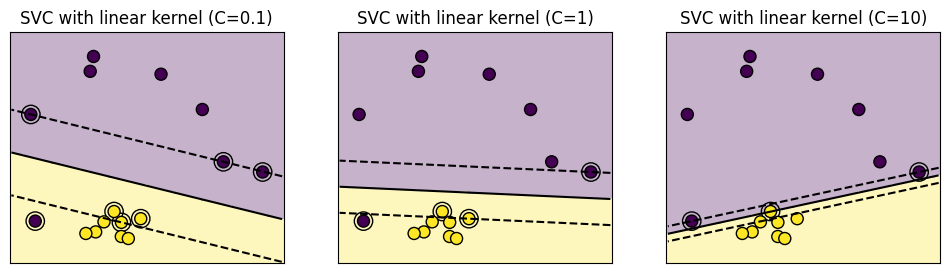

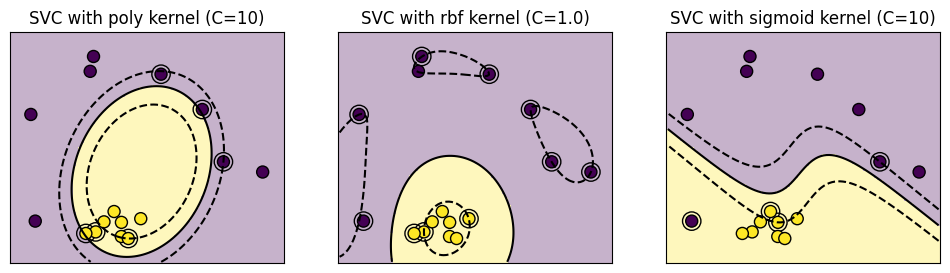

In [ ]:
from sklearn.svm import SVC # kernel 함수가 linear 분만 아니라 다른 형태로 출력할 수 있게 해주는 옵션

# C를 변화시킴에 따라 달라지는 결정 경계
fig, sub = plt.subplots(1, 3, figsize=(12, 3))

# C=0.1
linear_model = SVC(kernel='linear', C=0.1).fit(X, y)
plot_decisionBoundary(linear_model, X, y, ax=sub[0], show=False)

# C=1
linear_model = SVC(kernel = 'linear',C = 1).fit(X,y)
plot_decisionBoundary(linear_model, X, y, ax=sub[1], show=False)

# C=10   # C의 값이 커질 수록 마진의 넓이가 좁아짐 (빡빡해짐)
linear_model = SVC(kernel = 'linear',C = 10).fit(X,y)
plot_decisionBoundary(linear_model, X, y, ax=sub[2])

# ------------------------------------------------------------ 여기까지 선형

# 비선형 커널을 사용한 비선형 SVM
#  + 다양한 매개변수(degree, gamma, C)들을 조절해 보았다.
fig, sub = plt.subplots(1, 3, figsize=(12, 3))

# 2차원 poly 커널
poly_model = SVC(kernel = 'poly', degree = 2, C = 10).fit(X,y)  # degree가 2라는 거는 2차원 형태
plot_decisionBoundary(poly_model, X, y, ax=sub[0], show=False)

# gamma=0.1인 rbf 커널   # 가우시안 커널, 거리를 기반으로 분류를 해줌, 감마는 거리에 대한 중요도를 얼마로 설정할지. 감마를 0.01로 하면 멀리 있더라도 허용을 해주는, 1로 높게 설정하면 가까이 있는 것들만 모이겠끔 형성
rbf_model = SVC(kernel = 'rbf', gamma = 0.1).fit(X,y)
plot_decisionBoundary(rbf_model, X, y, ax=sub[1], show=False)

# sigmoid 커널
rbf_model = SVC(kernel = 'sigmoid',C = 10).fit(X,y)
plot_decisionBoundary(rbf_model, X, y, ax=sub[2])


### Confusion Matrix
다음으로는 분류 모델의 성능을 측정하는 방법 중 하나인 Confusion matrix입니다.

모델이 예측한 레이블과 정답 레이블을 바탕으로 만들 수 있습니다. 테이블 형태로 만들어줌

sklearn.metrics의 ConfusionMatrixDisplay 클래스를 통해 시각화할 수 있습니다.

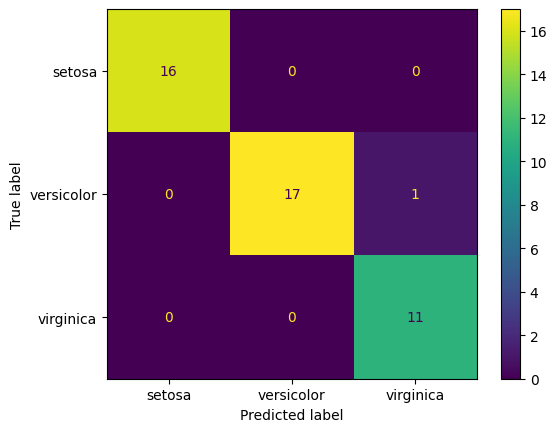

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# 데이터가 균형적일 때 사용하면 좋음
ConfusionMatrixDisplay.from_predictions(y_test,predictions, display_labels = iris.target_names) # from prediction은 예측된 결과값들을 가지고 예측을 하겠다 (실제값, 예측값))

Confusion Matrix를 기반으로 계산할 수 있는 평가 수치가 있습니다.

Accuracy, Precision, Recall, F1 score를 계산해보도록 하겠습니다.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 클래스가 binary 형태가 아니고, multiclass라면
# average 매개변수를 통해 평가 방법을 정해줘야 합니다 , 클래스가 여러개니까 binary는 두 개만 고려하니까 여러 개의 클래스를 고려하기 위해서 average 옵션 사용해줌
acc = accuracy_score(y_test, predictions)     # accuracy는 binary라서 average 사용 안해줘도 됨
recall =  recall_score(y_test,predictions, average = "micro")   # 클래스가 여러개니까 각각의 클래스에 대해서 이렇게 수행해! 방식을 알려주는 옵션이 average, micro는 전체 샘플에 대해서 균형된 평가 후 평균
precision = precision_score(y_test,predictions, average = "macro") # macro는 클래스 단위로 계산 후 평균
f1 = f1_score(y_test,predictions, average = "weighted") # weighted 는 클래스 별로 데이터 수에 따라서 가중 평균을 낸다, average에 None을 넣어주면 클래스 별로 결과를 보여줌, 뷸군형 데이터면 macro말고 micro나 weighted 를 쓰는게 낫다

print(f"Accuracy: {acc:.4f}")
print(f"Recall:", recall)
print(f"Precision:", precision)
print(f"F1 Score:", f1)

Accuracy: 0.9778
Recall: 0.9777777777777777
Precision: 0.9722222222222222
F1 Score: 0.9779434092477569


## 회귀

데이터의 연속적인 값을 예측하는 작업입니다.\
하나의 변수(y)가 다른 변수들(X)에게 어떻게 영향을 받는지 이해하는 데 사용할 수 있습니다.

Linear Regression (선형 회귀)
데이터 간의 선형적인 관계를 포착하고 싶을 때 사용하는 회귀 기법입니다.

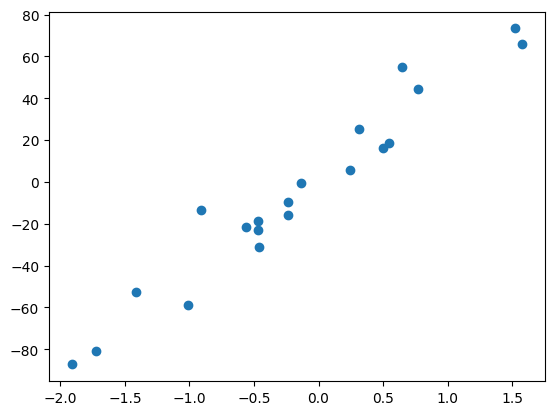

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비
X, y = datasets.make_regression(n_samples=20, n_features=1, noise=10, random_state=42)
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sklearn.linear_model에서는 선형 회귀 수행할 수 있도록 LinearRegression을 제공합니다.

마찬가지로 fit과 predict 메소드를 통해 실습을 진행해봅시다.

In [ ]:
from sklearn.linear_model import LinearRegression

# LinearRegression 객체 생성
regr = LinearRegression()

# train 데이터셋으로 데이터 학습
regr.fit(X_train,y_train)

# test 데이터셋으로 예측
predictions = regr.predict(X_test)

print("실제 정답", y_test, sep='\n')
print("모델의 예측", predictions, sep='\n')

실제 정답
[ 55.13401045  -0.3286151  -87.31424772  16.35889198  -9.45684094
 -52.47453543]
모델의 예측
[ 30.06594737  -5.62715589 -86.23737089  23.20962718  -9.98184288
 -63.48612349]


맞았다, 틀렸다를 확실히 할 수 있는 분류 문제와는 다르게\
회귀는 실제 값과 예측 값 간의 오차를 통해 성능을 측정합니다.

대표적으로, 오차들의 제곱을 평균한 MSE이 있고, 평균과 오차를 이용한 R2 score가 있습니다.

평균제곱오차: 137.68
R2 score: 0.94


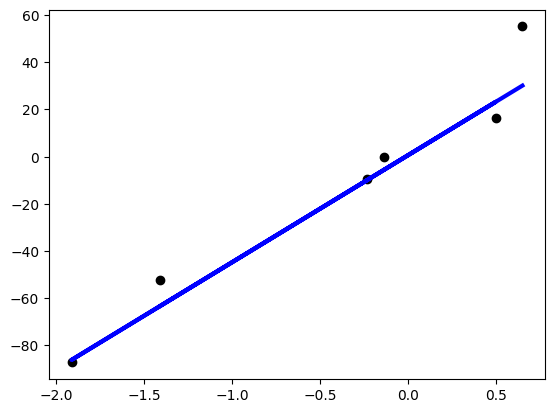

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)

print(f'평균제곱오차: {mse:.2f}') # 작을 수록 오차가 낮은 모델
print(f'R2 score: {r2:.2f}') # 1에 가까울수록 좋은 모델

plt.scatter(X_test, y_test, color='k')
plt.plot(X_test, predictions, color='b', linewidth=3)

plt.show()

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.